# Import Libraries

In [4]:

import pandas as pd
from typing import List

# label Enconder
from sklearn.preprocessing import LabelEncoder
# Scaling
#Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# splitting
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


import pandas as pd
from typing import List
#plotting
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


import warnings
warnings.filterwarnings("ignore")


# Load Dataset

In [5]:
# Load the dataset
file_path = "D:\Programming\College\ML\Project\Project\Milestone 1/Data\games-regression-dataset.csv"

dataset = pd.read_csv(file_path,
                      parse_dates=['Original Release Date','Current Version Release Date'], dayfirst=True)

In [6]:
dataset.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",2018-03-06,2019-07-31,4.0
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",2013-03-21,2017-06-28,3.5
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",2013-04-04,2015-04-21,4.5
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",2011-05-26,2019-07-23,3.5
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",2017-05-19,2019-02-06,4.5


In [7]:
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

In [8]:
description(dataset)

,Name,dtypes,Missing,Uniques
0,URL,object,0,5171
1,ID,int64,0,5171
2,Name,object,0,5171
3,Subtitle,object,3749,1399
4,Icon URL,object,0,5171
5,User Rating Count,int64,0,1410
6,Price,float64,0,17
7,In-app Purchases,object,2039,2052
8,Description,object,0,5099
9,Developer,object,0,3084


## Check Dublictes

In [9]:
# Count the number of duplicate rows
dataset.duplicated().sum() 

43

In [10]:
# Drop duplicate rows
dataset = dataset.drop_duplicates()

In [11]:
# Count the number of duplicate rows
dataset.duplicated().sum()

0

## Label Encoder

In [12]:
# Print the 'Name' and 'Gender' columns
dataset[['URL','Name','Subtitle','Icon URL','Description']].head()

,URL,Name,Subtitle,Icon URL,Description
0,https://apps.apple.com/us/app/heir-of-light/id...,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,"A Dark Fantasy, Collectible RPG\n\nDarkness ha..."
1,https://apps.apple.com/us/app/endgame-eurasia/...,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,"""This interactive experience is an exploration..."
2,https://apps.apple.com/us/app/free-solitaire/i...,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Same Solitaire game with classic Solitaire run...
3,https://apps.apple.com/us/app/draft-trainer/id...,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,** Discounted for a limited time **\n\nEver wo...
4,https://apps.apple.com/us/app/rogue-knight-inf...,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Fight or sneak your way through hordes of mons...


In [13]:
def Feature_Encoder(X,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
    return X


#Feature Encoding
cols=('Name','URL','Icon URL','Description','Subtitle')
dataset=Feature_Encoder(dataset,cols)

In [14]:
# Print the 'Name' and 'Gender' columns
dataset[['URL','Name','Subtitle','Icon URL','Description']]

,URL,Name,Subtitle,Icon URL,Description
0,2336,2379,451,2526,2131
1,1710,1841,1394,3359,1581
2,2010,2123,1394,4863,4082
3,1582,1712,1394,491,1941
4,3839,3882,1154,1604,3053
...,...,...,...,...,...
5209,3568,3618,316,1288,378
5210,2610,85,14,348,935
5211,4713,4716,1394,433,1636
5212,2549,2652,1394,4252,584


In [15]:
dataset[['URL','ID','Subtitle','Icon URL','Name','Description']].nunique()

URL            5171
ID             5171
Subtitle       1400
Icon URL       5171
Name           5171
Description    5099
dtype: int64

In [16]:
#We deleted all theses columns because they are Unique (Non-Meaningful)
#Subtitle Column almost all cells are Nan values 
#So we will drop this Columns

Columns_To_Deleted = ['URL','ID','Subtitle','Icon URL','Name','Description']
dataset = dataset.drop(columns = Columns_To_Deleted)

In [17]:
dataset.isnull().sum()

User Rating Count                  0
Price                              0
In-app Purchases                2025
Developer                          0
Age Rating                         0
Languages                         11
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
Average User Rating                0
dtype: int64

In [18]:
dataset[['In-app Purchases']]

,In-app Purchases
0,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ..."
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5209,"1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 2.99, 7.99..."
5210,"2.99, 4.99, 1.99, 2.99, 5.99, 9.99, 11.99, 19.99"
5211,NaN
5212,"9.99, 1.99, 4.99, 19.99, 4.99, 4.99, 4.99, 9.9..."


In [19]:
# Convert each cell into a list of floats, and compute the mean of the list
dataset['In-app Purchases'] = dataset['In-app Purchases'].apply(lambda x: sum([float(i) for i in x.split(',')]) if pd.notnull(x) else x)
# Replace the missing values with the mean of the In-app Purchases column
mean_value = dataset['In-app Purchases'].mean()
dataset['In-app Purchases'] = dataset['In-app Purchases'].fillna(mean_value)

In [20]:
dataset[['In-app Purchases']]

,In-app Purchases
0,307.840000
1,61.674269
2,61.674269
3,61.674269
4,61.674269
...,...
5209,53.860000
5210,60.920000
5211,61.674269
5212,121.900000


In [21]:
dataset.isnull().sum()

User Rating Count                0
Price                            0
In-app Purchases                 0
Developer                        0
Age Rating                       0
Languages                       11
Size                             0
Primary Genre                    0
Genres                           0
Original Release Date            0
Current Version Release Date     0
Average User Rating              0
dtype: int64

In [22]:
dataset[['Languages']]

,Languages
0,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI"
1,EN
2,"EN, ZH"
3,EN
4,EN
...,...
5209,"EN, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ES..."
5210,"EN, JA, KO"
5211,EN
5212,EN


In [23]:
# split the string values into lists of languages
Lang_temp = dataset['Languages'].str.split(',')
print(Lang_temp)
print("------------------------------------------------------------------------")

# use explode to convert the list column into separate rows
exploded_Lang = Lang_temp.explode()    #from 5214 to 20429
print(exploded_Lang)

# fill missing values with mode value
mode_value = exploded_Lang.mode()[0]
dataset['Languages'] = dataset['Languages'].fillna(value=mode_value)

0       [EN,  FR,  DE,  JA,  KO,  ZH,  ES,  TH,  ZH,  VI]
1                                                    [EN]
2                                               [EN,  ZH]
3                                                    [EN]
4                                                    [EN]
                              ...                        
5209    [EN,  FR,  DE,  IT,  JA,  KO,  NB,  PL,  PT,  ...
5210                                       [EN,  JA,  KO]
5211                                                 [EN]
5212                                                 [EN]
5213                                                 [EN]
Name: Languages, Length: 5171, dtype: object
------------------------------------------------------------------------
0        EN
0        FR
0        DE
0        JA
0        KO
       ... 
5210     JA
5210     KO
5211     EN
5212     EN
5213     EN
Name: Languages, Length: 20268, dtype: object


In [24]:
dataset.isnull().sum()

User Rating Count               0
Price                           0
In-app Purchases                0
Developer                       0
Age Rating                      0
Languages                       0
Size                            0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
Average User Rating             0
dtype: int64

In [25]:
dataset

,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
0,982,0.00,307.840000,GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",2018-03-06,2019-07-31,4.0
1,19,0.00,61.674269,Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",2013-03-21,2017-06-28,3.5
2,14,0.00,61.674269,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",2013-04-04,2015-04-21,4.5
3,88,1.99,61.674269,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",2011-05-26,2019-07-23,3.5
4,13,3.99,61.674269,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",2017-05-19,2019-02-06,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...
5209,205014,0.99,53.860000,Ndemic Creations,12+,"EN, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ES...",118793216,Games,"Games, Strategy, Simulation",2012-05-26,2019-02-08,4.5
5210,252,0.00,60.920000,"AFEEL, Inc.",4+,"EN, JA, KO",79267840,Games,"Games, Simulation, Strategy, Entertainment",2015-01-11,2018-04-16,4.5
5211,12,0.00,61.674269,Stasis Software LLC,4+,EN,19513344,Utilities,"Utilities, Games, Board, Strategy",2012-08-16,2017-02-21,5.0
5212,578,0.00,121.900000,ZEN Studios Ltd.,9+,EN,275680256,Games,"Games, Strategy, Role Playing",2016-06-08,2017-01-30,4.0


### Preproccessing Age Rating   (from 4+  to  4)

In [26]:
# Convert Age Rating to string and lowercase
dataset['Age Rating'] = dataset['Age Rating'].astype(str).str.lower()
# Rename column
dataset.rename(columns={'Age Rating': 'Min Age'}, inplace=True)
dataset['Min Age'] = dataset['Min Age'].str.replace('+','').astype(int)
dataset[['Min Age']]

,Min Age
0,12
1,12
2,4
3,9
4,12
...,...
5209,12
5210,4
5211,4
5212,9


### Convert Categorical Data to numeric based on Label(Average User Rating)

In [27]:

dataset[['Developer','Languages','Primary Genre','Genres']]

,Developer,Languages,Primary Genre,Genres
0,GAMEVIL Inc.,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",Games,"Games, Role Playing, Strategy"
1,Auroch Digital Ltd,EN,Games,"Games, Simulation, Strategy, News"
2,Chen Zhong Yuan,"EN, ZH",Games,"Games, Strategy, Entertainment, Card"
3,"GG Wizards, LLC",EN,Games,"Games, Utilities, Card, Strategy"
4,Luis Regueira,EN,Games,"Games, Role Playing, Strategy"
...,...,...,...,...
5209,Ndemic Creations,"EN, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ES...",Games,"Games, Strategy, Simulation"
5210,"AFEEL, Inc.","EN, JA, KO",Games,"Games, Simulation, Strategy, Entertainment"
5211,Stasis Software LLC,EN,Utilities,"Utilities, Games, Board, Strategy"
5212,ZEN Studios Ltd.,EN,Games,"Games, Strategy, Role Playing"


### Enconding

In [28]:
dataset['Developer'] = dataset.groupby('Developer')['Average User Rating'].transform(lambda x: x.mean())
dataset['Languages'] = dataset.groupby('Languages')['Average User Rating'].transform(lambda x: x.mean())
dataset['Primary Genre'] = dataset.groupby('Primary Genre')['Average User Rating'].transform(lambda x: x.mean())
dataset['Genres'] = dataset.groupby('Genres')['Average User Rating'].transform(lambda x: x.mean())

In [29]:
dataset[['Developer','Languages','Primary Genre','Genres']]

,Developer,Languages,Primary Genre,Genres
0,4.250,4.000000,4.038315,4.116667
1,3.250,4.014370,4.038315,4.000000
2,4.000,4.056122,4.038315,4.096774
3,3.500,4.014370,4.038315,3.250000
4,4.500,4.014370,4.038315,4.116667
...,...,...,...,...
5209,4.500,4.500000,4.038315,3.947802
5210,4.125,4.195652,4.038315,3.853448
5211,5.000,4.014370,4.016129,5.000000
5212,4.250,4.014370,4.038315,4.182203


In [30]:
# Convert the date columns to datetime format
StartDate = pd.to_datetime(dataset['Original Release Date'])
EndDate = pd.to_datetime(dataset['Current Version Release Date'])

# Create a new column with the difference in days between the two datesP
dataset['Days Since Release'] = (EndDate - StartDate).dt.days

# Drop the original date columns
dataset.drop(columns = ['Original Release Date', 'Current Version Release Date'], inplace=True)

dataset[['Days Since Release']]

,Days Since Release
0,512
1,1560
2,747
3,2980
4,628
...,...
5209,2449
5210,1191
5211,1650
5212,236


In [31]:
dataset

,User Rating Count,Price,In-app Purchases,Developer,Min Age,Languages,Size,Primary Genre,Genres,Average User Rating,Days Since Release
0,982,0.00,307.840000,4.250,12,4.000000,894489600,4.038315,4.116667,4.0,512
1,19,0.00,61.674269,3.250,12,4.014370,116407296,4.038315,4.000000,3.5,1560
2,14,0.00,61.674269,4.000,4,4.056122,50647040,4.038315,4.096774,4.5,747
3,88,1.99,61.674269,3.500,9,4.014370,28120064,4.038315,3.250000,3.5,2980
4,13,3.99,61.674269,4.500,12,4.014370,39915520,4.038315,4.116667,4.5,628
...,...,...,...,...,...,...,...,...,...,...,...
5209,205014,0.99,53.860000,4.500,12,4.500000,118793216,4.038315,3.947802,4.5,2449
5210,252,0.00,60.920000,4.125,4,4.195652,79267840,4.038315,3.853448,4.5,1191
5211,12,0.00,61.674269,5.000,4,4.014370,19513344,4.016129,5.000000,5.0,1650
5212,578,0.00,121.900000,4.250,9,4.014370,275680256,4.038315,4.182203,4.0,236


### Features & Labels

In [33]:
data_input = dataset.drop(columns = ['Average User Rating'])  # Features
data_output = dataset['Average User Rating']  # Label

## Correlation

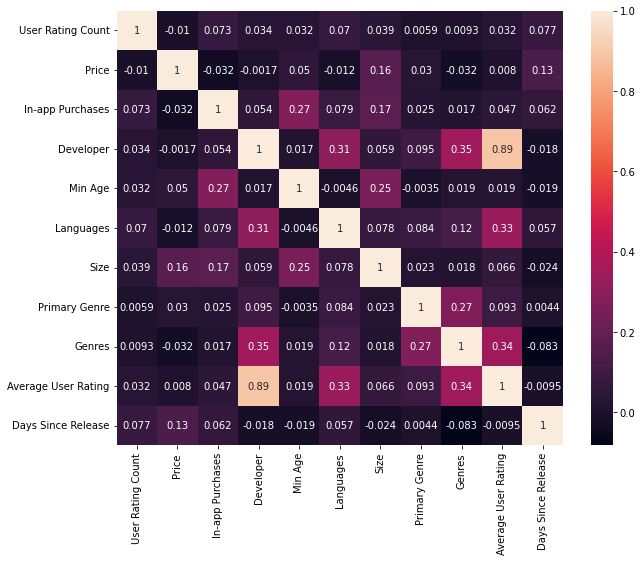

In [34]:
class Correlation:
    def __init__(self, data):
        self.data = data

    def correlate(self):
        corr = self.data.corr() #correlation on data
        fig, ax = plt.subplots(figsize=(10, 8)) #size of figure
        sns.heatmap(corr,annot=True, ax=ax) #annot: To show numbers , ax:to apply size
        plt.show()
        
        
c = Correlation(dataset)
c.correlate()


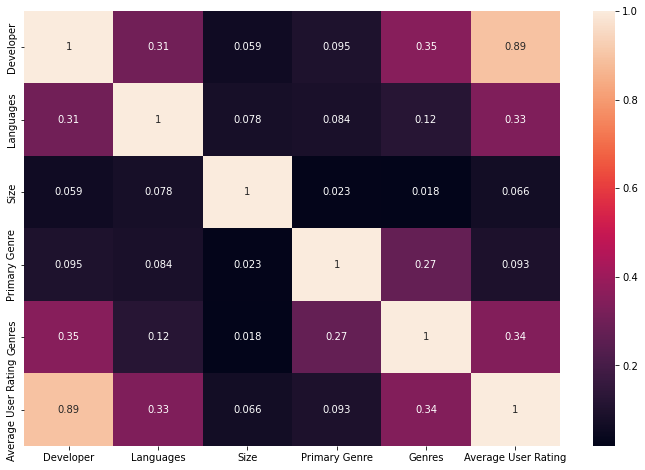

In [36]:
Game_corr = dataset.corr()
# Top 5% Correlation training features with the Value
Common_features = Game_corr.index[abs(Game_corr['Average User Rating']) > 0.05]
# Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = dataset[Common_features].corr()
sns.heatmap(top_corr, annot=True)
plt.show()
Top = Common_features.delete(-1)
data_input = data_input[Top]


In [37]:
data_input

,Developer,Languages,Size,Primary Genre,Genres
0,4.250,4.000000,894489600,4.038315,4.116667
1,3.250,4.014370,116407296,4.038315,4.000000
2,4.000,4.056122,50647040,4.038315,4.096774
3,3.500,4.014370,28120064,4.038315,3.250000
4,4.500,4.014370,39915520,4.038315,4.116667
...,...,...,...,...,...
5209,4.500,4.500000,118793216,4.038315,3.947802
5210,4.125,4.195652,79267840,4.038315,3.853448
5211,5.000,4.014370,19513344,4.016129,5.000000
5212,4.250,4.014370,275680256,4.038315,4.182203


### Train & Test Split

In [38]:
# Split the data into train, test
X_train, X_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.2, random_state=0)


## BEFORE SCALING

In [39]:
X_train

,Developer,Languages,Size,Primary Genre,Genres
3655,4.500000,4.014370,15027200,4.147059,4.500000
2501,4.500000,4.014370,67420160,4.038315,4.177083
3282,2.500000,4.014370,10806272,4.038315,3.994444
2988,4.166667,4.500000,835738624,4.038315,3.987179
2491,4.500000,3.433333,150199296,4.038315,4.062500
...,...,...,...,...,...
4972,3.500000,3.908537,6614449,4.038315,4.055556
3284,4.500000,4.014370,99400704,4.038315,3.906250
1659,3.250000,4.014370,43083776,4.038315,4.155080
2618,4.500000,4.250000,171896832,4.038315,4.017442


### Feature Scaling using (StandardScaler)

In [40]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training, validation, and test data
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Convert the scaled  data to a dataframe
X_train = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

X_test = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)



### Feature Scaling using (MinMaxScaler)


In [ ]:
# #Initialize the scaler
# scaler = MinMaxScaler()

# # Fit the scaler to the training data
# scaler.fit(X_train)

# # Scale the training, validation, and test data
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Convert the scaled  data to a dataframe
# X_train = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
# X_test = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)

### AFTER SCALING

In [41]:
X_train

,Developer,Languages,Size,Primary Genre,Genres
0,0.696052,-0.075035,-0.482254,1.584169,1.796414
1,0.696052,-0.075035,-0.276387,0.065616,0.553951
2,-2.268940,-0.075035,-0.498840,0.065616,-0.148775
3,0.201887,1.825470,2.742558,0.065616,-0.176727
4,0.696052,-2.348907,0.048876,0.065616,0.113078
...,...,...,...,...,...
4131,-0.786444,-0.489210,-0.515310,0.065616,0.086358
4132,0.696052,-0.075035,-0.150726,0.065616,-0.488114
4133,-1.157068,-0.075035,-0.372012,0.065616,0.469292
4134,0.696052,0.847100,0.134132,0.065616,-0.060289


In [42]:
#########################Linear Regression############################

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


print('///////////////linear_regression/////////////////////////')
print(f"Mean Square Error on test set: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score on test set: {r2_score(y_test, y_pred)}\n")
print("_____________________________________________________________")
######################################################################

///////////////linear_regression/////////////////////////
Mean Square Error on test set: 0.09947522780277279
R2 Score on test set: 0.8102422699212457

_____________________________________________________________


In [43]:
######################################################################
rand = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rand.fit(X_train, y_train)
y_pred_test_rand = rand.predict(X_test)

print('//////////////Random Forest regression//////////////////////')
print(f"Mean Square Error on test set: {mean_squared_error(y_test, y_pred_test_rand)}")
print(f"R2 Score on test set: {r2_score(y_test, y_pred_test_rand)}\n")
print("_____________________________________________________________")
    
#####################################################################

//////////////Random Forest regression//////////////////////
Mean Square Error on test set: 0.10021472563685462
R2 Score on test set: 0.808831612881367

_____________________________________________________________


In [44]:
#####################################################################

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression().fit(X_train_poly, y_train)
poly_features.fit(X_train, y_train)
pred_pol = poly_model.predict(poly_features.fit_transform(X_test))


print('//////////////polynomial_regression//////////////////////')
print(f"MSE on test set: {metrics.mean_squared_error(y_test, pred_pol)}")
print(f"R2 Score on test set: {r2_score(y_test, pred_pol)}\n")

//////////////polynomial_regression//////////////////////
MSE on test set: 0.09934374550261534
R2 Score on test set: 0.8104930839517788



In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

class PCAModelVisualizer:
    def __init__(self, dataset):
        self.dataset = dataset
    
    def fit_transform(self, n_components):
        pca = PCA(n_components=n_components)
        pca.fit(self.dataset)
        self.dataset_pca = pca.transform(self.dataset)
    
    def plot(self, target, title):
        plt.scatter(self.dataset_pca[:, 0], self.dataset_pca[:, 1], c=target)
        plt.xlabel('First Principal Component')
        plt.ylabel('Average User Rating')
        plt.title(title)
        plt.colorbar()
        plt.show()


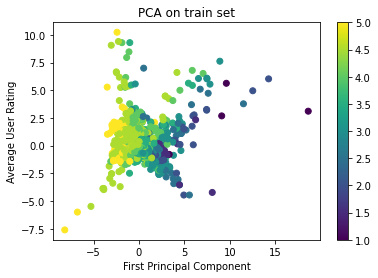

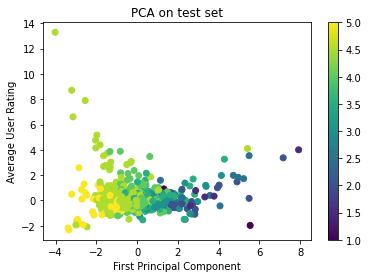

In [46]:
# Create a PCAModelVisualizer object and fit_transform on the dataset
pca_visualizer = PCAModelVisualizer(X_train)
pca_visualizer.fit_transform(5)

# Plot the transformed dataset with the target variable
pca_visualizer.plot(y_train, 'PCA on train set')

# Create a PCAModelVisualizer object and fit_transform on the dataset
pca_visualizer = PCAModelVisualizer(X_test)
pca_visualizer.fit_transform(5)

# Plot the transformed dataset with the target variable
pca_visualizer.plot(y_test, 'PCA on test set')